In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import os

from estimators import offline_MIP
from estimators import online_MIP


'NuriaJrFiltered' : [[43.75, 0.307], [125, 2]],
'NadiaLateFilteredDownsampled' : [[42.95, 0.408], [120, 2]],
'NadiaEarlyFilteredDownsampled' : [[42.17, 0.657], [112, 1]],
'NuriaJrFilteredT1' : [[46.73, 0.295], [12, 0]],
'NadiaLateFilteredDownsampledT1' : [[42.34, 0.347], [12, 0]],
'NadiaEarlyFilteredDownsampledT1' : [[43.89, 0.467], [12, 0]],


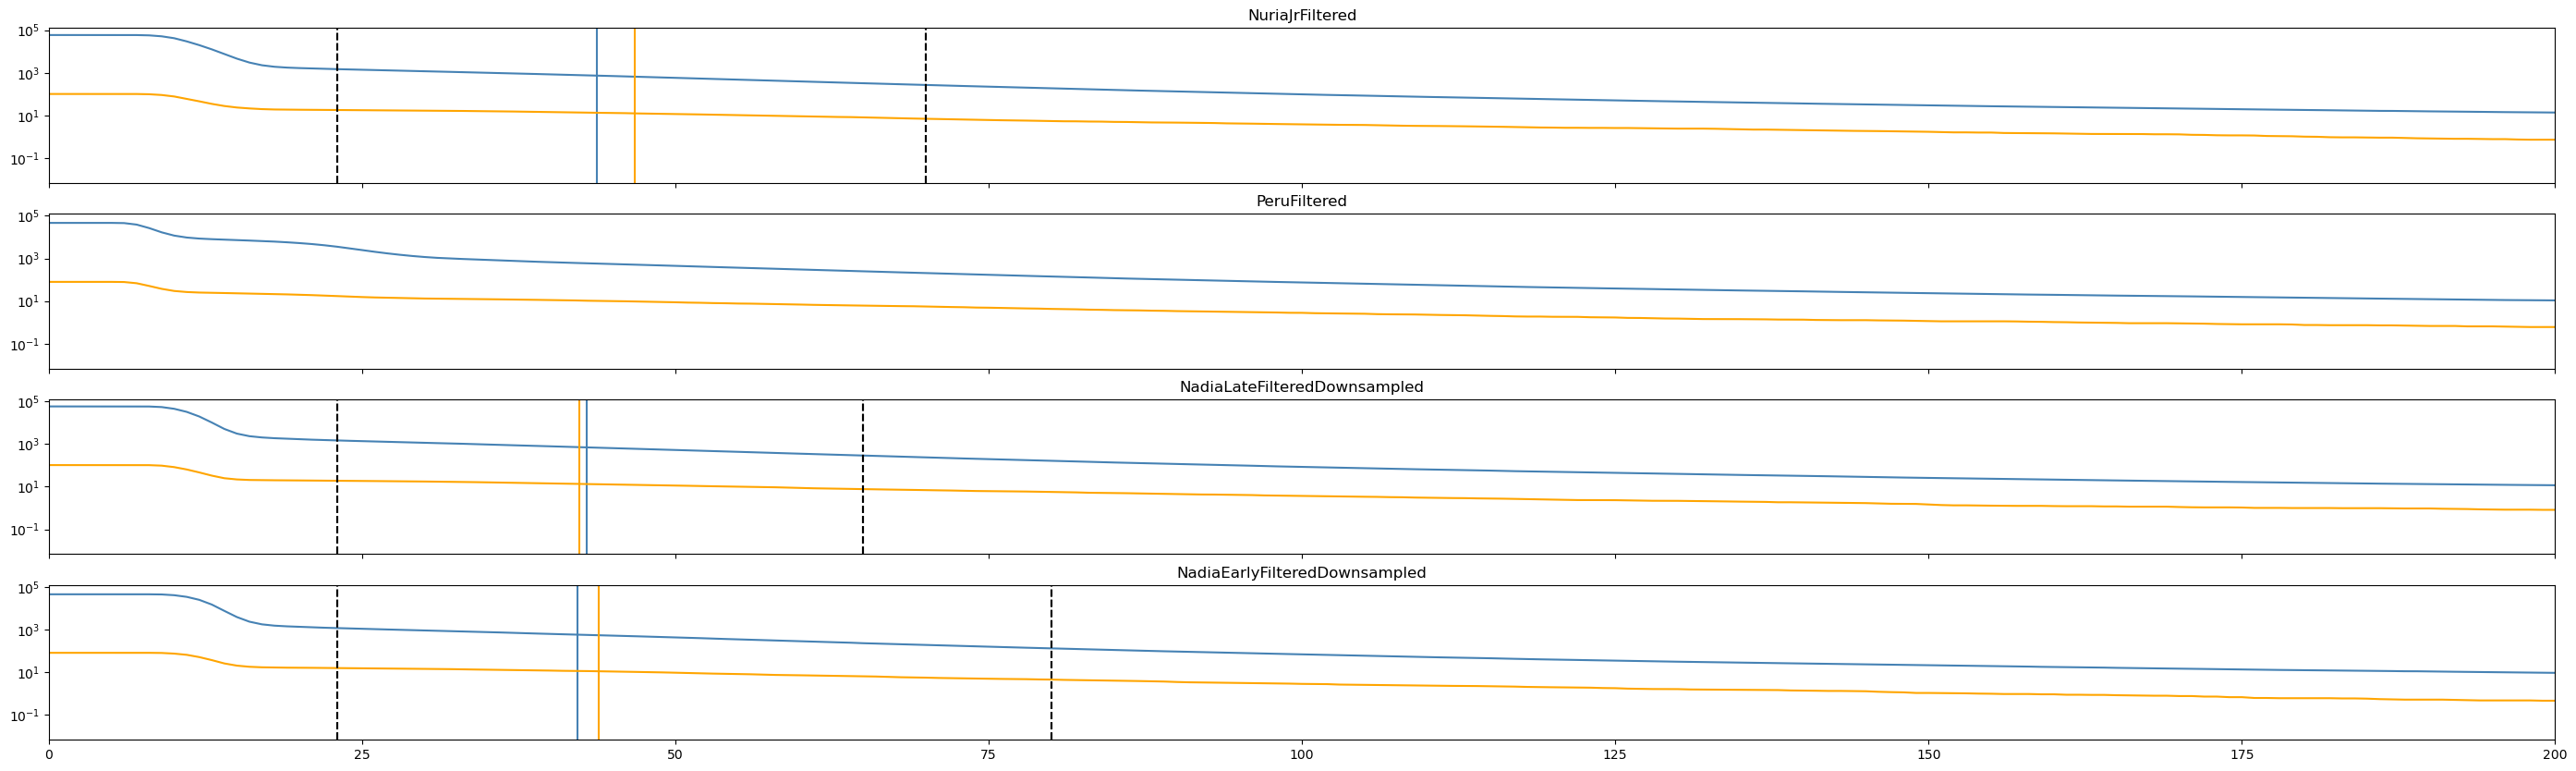

In [9]:
data_path = "/cr/tempdata01/filip/SSDCalib/"
fig, ax = plt.subplots(4, 1, sharex = True, sharey = True)
plt.rcParams["figure.figsize"] = [35, 10]

offline_T1, offline_noT1 = {}, {}


def exp_background(x0, m, x, b):
    return np.exp(m * (x-x0) + b)

for T1 in ["", "T1"]:
    for i, station in enumerate(os.listdir(f"{data_path}/UubRates{T1}")):

        ax[i].set_title(station)

        if T1 == "T1":
            color="orange"
            label="T1 imposed"
        else:
            color="steelblue"
            label="No T1 imposed"

        data_dir = f"{data_path}/UubRates{T1}/{station}/"

        rates = np.zeros(1000)

        for file_id in range(1, len(os.listdir(data_dir))):
            rates += np.loadtxt(data_dir + f"randoms{file_id:04d}.dat")

        station_time = file_id * 8.33e-9 * 2048 * 5000
        rates /= station_time
        
        ax[i].plot(range(1000), rates, c = color, label = label)

        if station == "NuriaJrFiltered":
            x_min, x_max = (23, 70)
        elif station == "PeruFiltered":
            x_min, x_max = (12, 26)
            continue
        elif station == "NadiaLateFilteredDownsampled":
            x_min, x_max = 23, 65
        elif station == "NadiaEarlyFilteredDownsampled":
            x_min, x_max = 23, 80

        # x_min, x_max = np.argmax(np.diff(np.diff(rates))) + 6, 401
        # residuals = np.array([-1])

        # if T1 == "T1":
        #     while np.any(residuals < 0) and x_max - x_min > 20:
        #         x_max -= 1

        #         m, b = (np.log(rates[x_max]) - np.log(rates[x_min])) / (x_max - x_min), np.log(rates[x_min])
        #         residuals = rates[x_min:x_max+1] - exp_background(x_min, m, range(x_min, x_max+1), b)

        #     while np.all(residuals >= 0):
        #         x_min -= 1

        #         m, b = (np.log(rates[x_max]) - np.log(rates[x_min])) / (x_max - x_min), np.log(rates[x_min])
        #         residuals = rates[x_min:x_max+1] - exp_background(x_min, m, range(x_min, x_max+1), b)
        # else:
        #     x_max = 100

        mu, sigma = offline_MIP(x_min, x_max, rates)
        eta, chi = online_MIP(50, rates, station_time)
        ax[i].axvline(mu, c=color)

        print(f"'{station}{T1}' : [[{mu:.2f}, {sigma:.3f}], [{eta}, {chi}]],")

        ax[i].axvline(x_min, c='k',ls='--')
        ax[i].axvline(x_max, c='k', ls='--')
        ax[i].set_yscale('log')
        ax[i].set_xlim(0, 200)

In [10]:
# results copied from above
MIPs = {
    'NuriaJrFiltered' : [[43.75, 0.307], [125, 2]],
    'NadiaLateFilteredDownsampled' : [[42.95, 0.408], [120, 2]],
    'NadiaEarlyFilteredDownsampled' : [[42.17, 0.657], [112, 1]],
    'NuriaJrFilteredT1' : [[46.73, 0.295], [12, 0]],
    'NadiaLateFilteredDownsampledT1' : [[42.34, 0.347], [12, 0]],
    'NadiaEarlyFilteredDownsampledT1' : [[43.89, 0.467], [12, 0]],
}

NuriaJrFiltered 2.857
NadiaLateFilteredDownsampled 2.794
NadiaEarlyFilteredDownsampled 2.656
NuriaJrFilteredT1 0.257
NadiaLateFilteredDownsampledT1 0.283
NadiaEarlyFilteredDownsampledT1 0.273


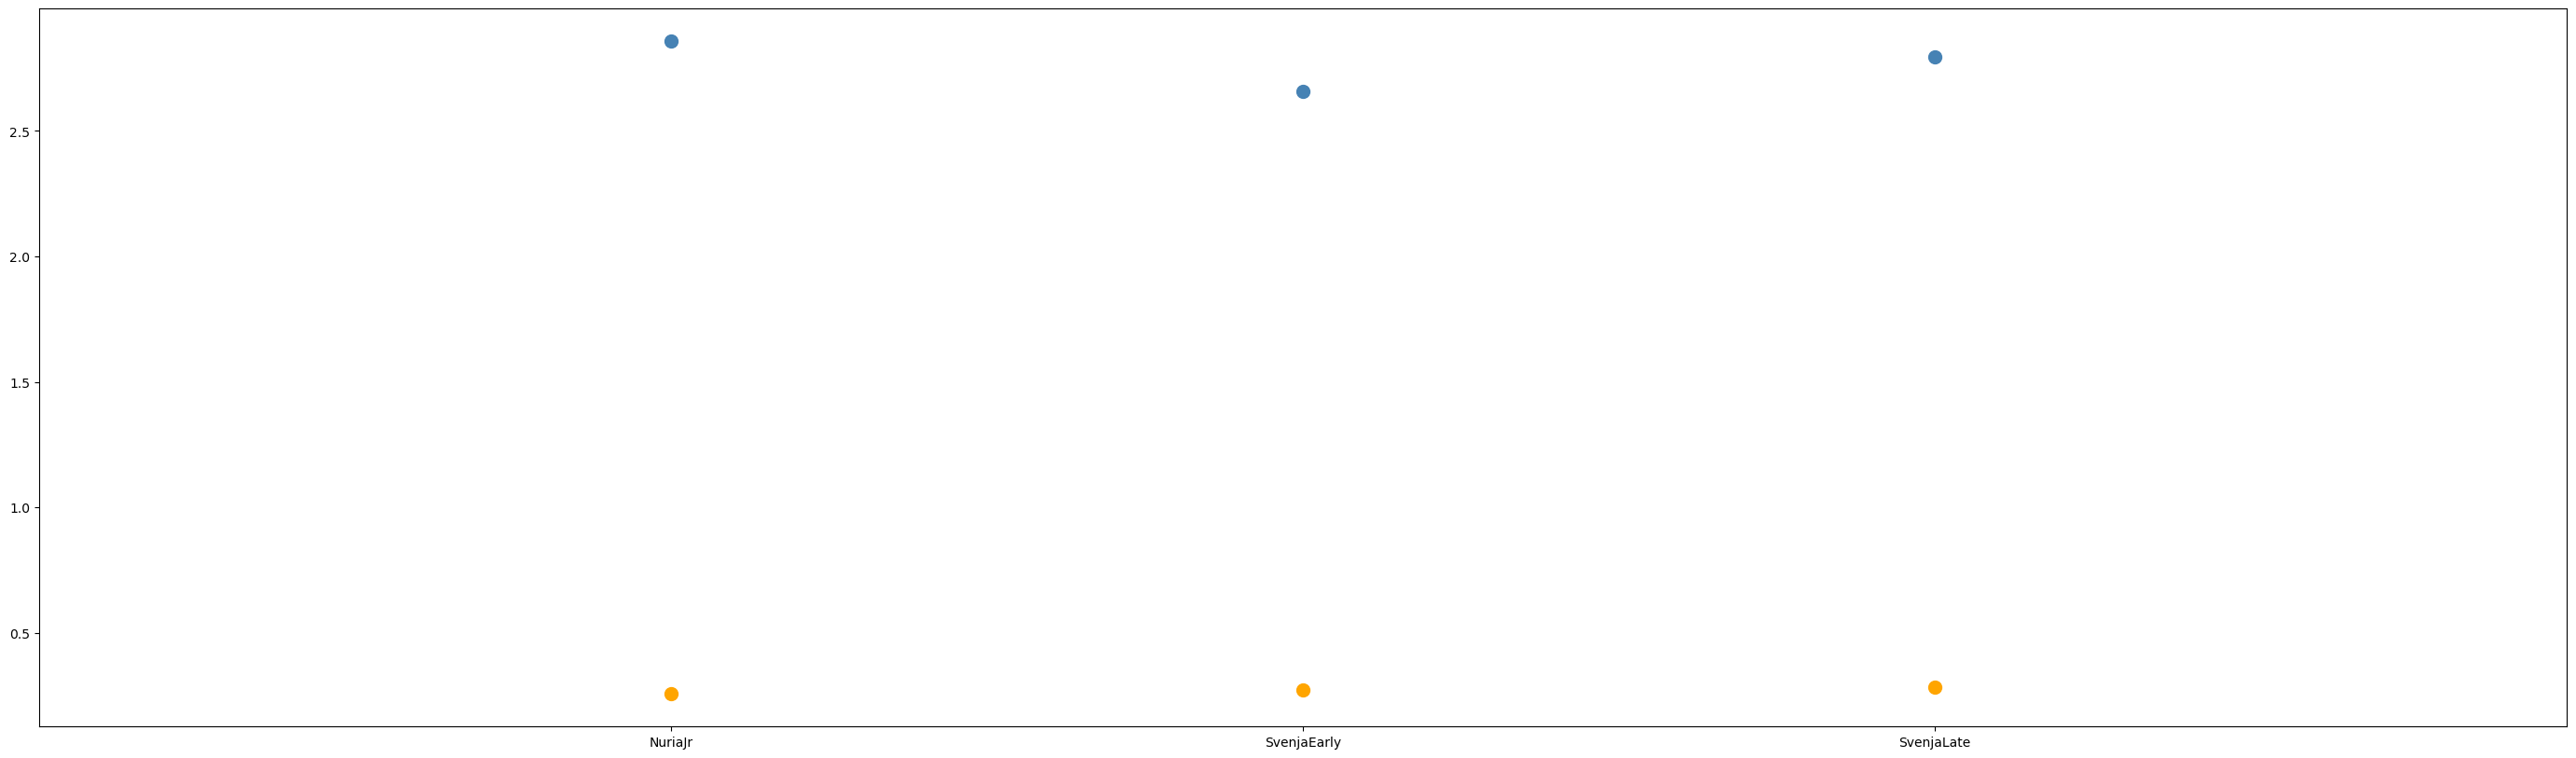

In [15]:
T1_ratios, ratios = [], []

for key, item in MIPs.items():

    if "Nuria" in key: i = 0
    # elif "Peru" in key: i = 1
    elif "NadiaEarly" in key: i = 1
    elif "NadiaLate" in key: i = 2

    if "T1" in key: 
        c="orange"
        r = T1_ratios
    else: 
        c="steelblue"
        r = ratios

    print(key, np.round(item[-1][0] / item[0][0], 3))
    r.append(item[-1][0] / item[0][0])

    plt.scatter(i, item[-1][0] / item[0][0], c = c, s=100)
    plt.xticks(range(3), ["NuriaJr", "SvenjaEarly", "SvenjaLate"])
    plt.xlim(-1, 3)

In [12]:
print(np.mean(T1_ratios), np.std(T1_ratios) / np.mean(T1_ratios))
print(np.mean(ratios), np.std(ratios) / np.mean(ratios))

0.2712083613731866 0.04048859736731915
2.7690019449467527 0.030343979033955797
